In [2]:
### importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
## reading dataset

df = pd.read_csv('Travel.csv')

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
## info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
## handling missing values

df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
## categorical variables

cat_features = [col for col in df.columns if df[col].dtype == 'object']

## numerical variables

num_features = [col for col in df.columns if df[col].dtype != 'object']

## discrete variables

discrete_features = [col for col in df.columns if len(df[col].unique()) <= 25]

## cont variables

cont_features = [col for col in df.columns if col not in discrete_features]

print("number of categorical features: \n", len(cat_features))
print("number of numerical features: \n", len(num_features))
print("number of discrete features: \n", len(discrete_features))
print("number of cont features: \n", len(cont_features))


number of categorical features: 
 6
number of numerical features: 
 14
number of discrete features: 
 16
number of cont features: 
 4


In [7]:
### check all categories present in categorical variables

for col in cat_features:
    print(f'categories of feature {col} are: \n',df[col].value_counts())
    print('-'*40)

categories of feature TypeofContact are: 
 TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
----------------------------------------
categories of feature Occupation are: 
 Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
----------------------------------------
categories of feature Gender are: 
 Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
----------------------------------------
categories of feature ProductPitched are: 
 ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
----------------------------------------
categories of feature MaritalStatus are: 
 MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
----------------------------------------
categories of feature Designation

In [8]:
### replace categories

df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [9]:
### check all categories present in categorical variables

for col in cat_features:
    print(f'categories of feature {col} are: \n',df[col].value_counts())
    print('-'*40)

categories of feature TypeofContact are: 
 TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
----------------------------------------
categories of feature Occupation are: 
 Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
----------------------------------------
categories of feature Gender are: 
 Gender
Male      2916
Female    1972
Name: count, dtype: int64
----------------------------------------
categories of feature ProductPitched are: 
 ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
----------------------------------------
categories of feature MaritalStatus are: 
 MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64
----------------------------------------
categories of feature Designation are: 
 Designation
Executive       

In [10]:
### missing values

features_with_na = [col for col in df.columns if df[col].isnull().sum()>=1]

for col in features_with_na:
    print(col, np.round(df[col].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [11]:
## descriptive stats on numerical values

df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing null values

1. impute median value for Age column
2. impute mode value for Type of contact column
3. impute median value for duration of pitch column
4. impute mode value for NumberofFollowups column
5. impoute mode value for PreferredPropertyStar column
6. impute median value for NumberofTrips column
7. impute mode value for NumberofChildren column
8. impute median value for MonthlyIncome column

In [12]:
### Age

df.Age.fillna(df.Age.median(), inplace=True)

### Type of contact
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

### duration of pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

### number of fellowship
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

### Number of trips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

### number of children visiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

### monthly income
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

### PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

### check for missing values
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [13]:
### drop columns

df.drop(columns=['CustomerID'],axis=1,inplace=True)

In [14]:
### add new columns

df['TotalVisiting'] = df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [15]:
### train test split

from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

print('Shape of X train: \n', X_train.shape)
print('Shape of X test: \n', X_test.shape)
print('Shape of y train: \n', y_train.shape)
print('Shape of y test: \n', y_test.shape)

Shape of X train: 
 (3910, 17)
Shape of X test: 
 (978, 17)
Shape of y train: 
 (3910,)
Shape of y test: 
 (978,)


In [16]:
### Transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder(drop='first',sparse_output=False)
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("onehotencoder", encoder, cat_features),
        ("standardscaler",scaler,num_features)
    ]
)

In [17]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [18]:
## model training

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [19]:
## function for metrics calculations

def metric_calculator(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    roc_auc = roc_auc_score(actual, predicted)

    return accuracy, precision, recall, f1, roc_auc

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) ## train the model

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # set performance metrics
    train_accuracy, train_precision, train_recall, train_f1, train_roc_auc = metric_calculator(y_train, y_train_pred)
    test_accuracy, test_precision, test_recall, test_f1, test_roc_auc = metric_calculator(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    # training performance metrics
    print(f"Train accuracy score: {train_accuracy}")
    print(f"Train precision score: {train_precision}")
    print(f"Train recall score: {train_recall}")
    print(f"Train f1 score: {train_f1}")
    print(f"Train roc auc score: {train_roc_auc}")

    print("="*35)
    # testing performance metrics
    print(f"Test accuracy score: {train_accuracy}")
    print(f"Test precision score: {test_precision}")
    print(f"Test recall score: {test_recall}")
    print(f"Test f1 score: {test_f1}")
    print(f"Test roc auc score: {test_roc_auc}")

    print('='*35)
    print('\n')

Logistic Regression
Train accuracy score: 0.8460358056265984
Train precision score: 0.7015873015873015
Train recall score: 0.30315500685871055
Train f1 score: 0.42337164750957856
Train roc auc score: 0.6368022755136056
Test accuracy score: 0.8460358056265984
Test precision score: 0.691358024691358
Test recall score: 0.2931937172774869
Test f1 score: 0.4117647058823529
Test roc auc score: 0.630713758257549


Decision Tree
Train accuracy score: 1.0
Train precision score: 1.0
Train recall score: 1.0
Train f1 score: 1.0
Train roc auc score: 1.0
Test accuracy score: 1.0
Test precision score: 0.8064516129032258
Test recall score: 0.7853403141361257
Test f1 score: 0.7957559681697612
Test roc auc score: 0.869798492519143


Random forest
Train accuracy score: 1.0
Train precision score: 1.0
Train recall score: 1.0
Train f1 score: 1.0
Train roc auc score: 1.0
Test accuracy score: 1.0
Test precision score: 0.9847328244274809
Test recall score: 0.675392670157068
Test f1 score: 0.8012422360248447
Te

In [21]:
### hyperparameter tuning

rf_params = {
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',10],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000]
}

gb_params = {
    'loss':['log_loss','exponential'],
    'learning_rate':[0.001,0.01,0.1,1.0,10],
    'n_estimators':[100,200,500,1000],
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',10],
    'min_samples_split':[2,8,15,20],
}

ab_params = {
    'n_estimators':[50,60,70,80,90],
    'algorithm':['SAMME','SAMME.R'],
}

In [22]:
randomcv_models = [
    ('RF',RandomForestClassifier(), rf_params ),
    ('Adaboost', AdaBoostClassifier(), ab_params),
    #('gradientboost',GradientBoostingClassifier(), gb_params)
]

In [23]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
    param_distributions=params,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"Best Params for {model_name}")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params for RF
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 10, 'max_depth': 15}
Best Params for Adaboost
{'n_estimators': 80, 'algorithm': 'SAMME'}


In [24]:
models = {
    #"Logistic Regression": LogisticRegression(),
    #"Decision Tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features=10, max_depth=15),
    #"Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(n_estimators= 80, algorithm='SAMME')
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) ## train the model

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # set performance metrics
    train_accuracy, train_precision, train_recall, train_f1, train_roc_auc = metric_calculator(y_train, y_train_pred)
    test_accuracy, test_precision, test_recall, test_f1, test_roc_auc = metric_calculator(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    # training performance metrics
    print(f"Train accuracy score: {train_accuracy}")
    print(f"Train precision score: {train_precision}")
    print(f"Train recall score: {train_recall}")
    print(f"Train f1 score: {train_f1}")
    print(f"Train roc auc score: {train_roc_auc}")

    print("="*35)
    # testing performance metrics
    print(f"Test accuracy score: {train_accuracy}")
    print(f"Test precision score: {test_precision}")
    print(f"Test recall score: {test_recall}")
    print(f"Test f1 score: {test_f1}")
    print(f"Test roc auc score: {test_roc_auc}")

    print('='*35)
    print('\n')

Random forest
Train accuracy score: 0.99923273657289
Train precision score: 1.0
Train recall score: 0.9958847736625515
Train f1 score: 0.9979381443298969
Train roc auc score: 0.9979423868312758
Test accuracy score: 0.99923273657289
Test precision score: 0.9577464788732394
Test recall score: 0.7120418848167539
Test f1 score: 0.8168168168168168
Test roc auc score: 0.8522089983168902


Adaboost
Train accuracy score: 0.8465473145780051
Train precision score: 0.7698744769874477
Train recall score: 0.252400548696845
Train f1 score: 0.38016528925619836
Train roc auc score: 0.6175551941849519
Test accuracy score: 0.8465473145780051
Test precision score: 0.7818181818181819
Test recall score: 0.225130890052356
Test f1 score: 0.34959349593495936
Test roc auc score: 0.6049415568432047




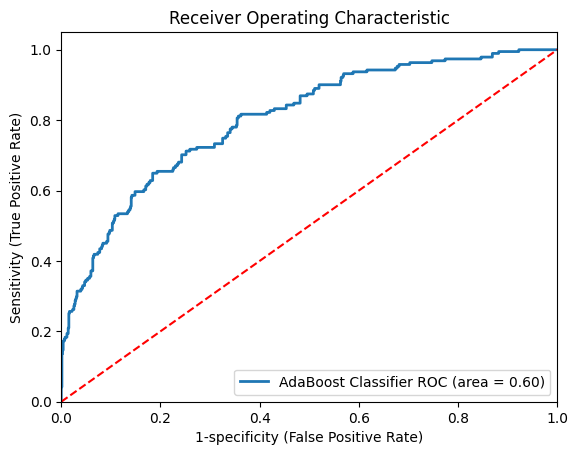

In [25]:
from sklearn.metrics import roc_curve

auc_models = [
    {
        'label': 'AdaBoost Classifier',
        'model': AdaBoostClassifier(n_estimators= 80, algorithm='SAMME'),
        'auc': 0.6049
    }
]

## create loop through all models

for algo in auc_models:
    model = algo['model'] #select the model
    model.fit(X_train, y_train) #train the model
    # compute false positive rate and true positive rate
    fpr, tpr, tresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    #calculate the area under the curve 
    plt.plot(fpr, tpr, label = '%s ROC (area = %0.2f)'% (algo['label'],algo['auc']),linewidth=2)

    ## custom setting for plot
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1-specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()